# Q1: a.	Use hierarchical clustering for 3 clusters. So you will stop when there are clusters formed. (hand calculation)
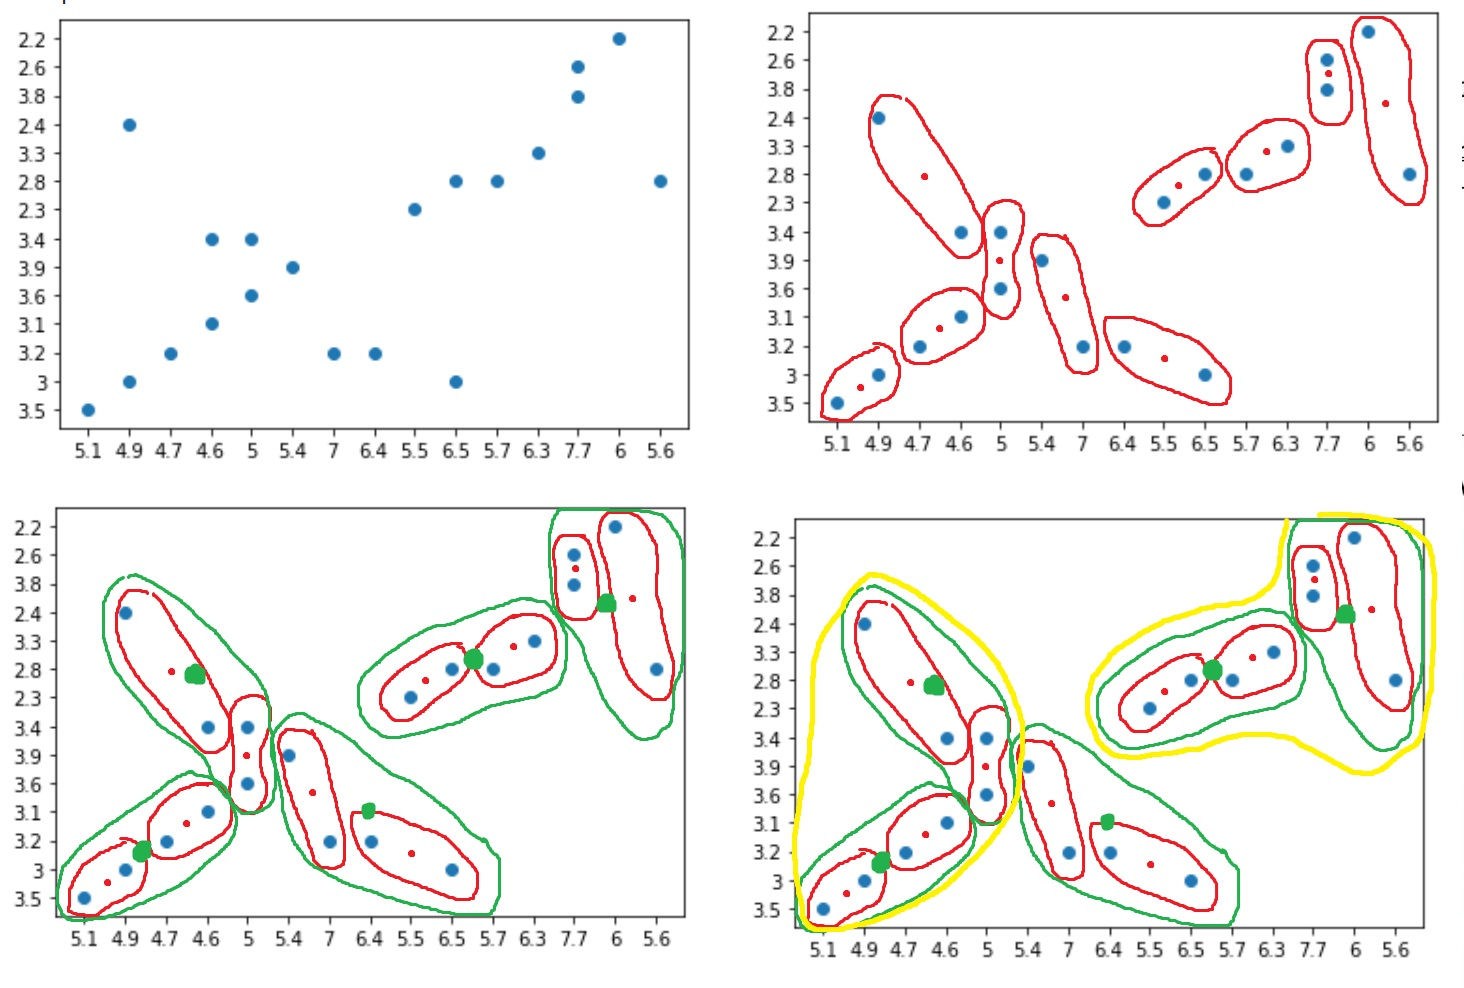

#Draw the tree with pen and paper how you combine the points to create three clusters. (Example: fig 7.6, page 262, MMDS book)

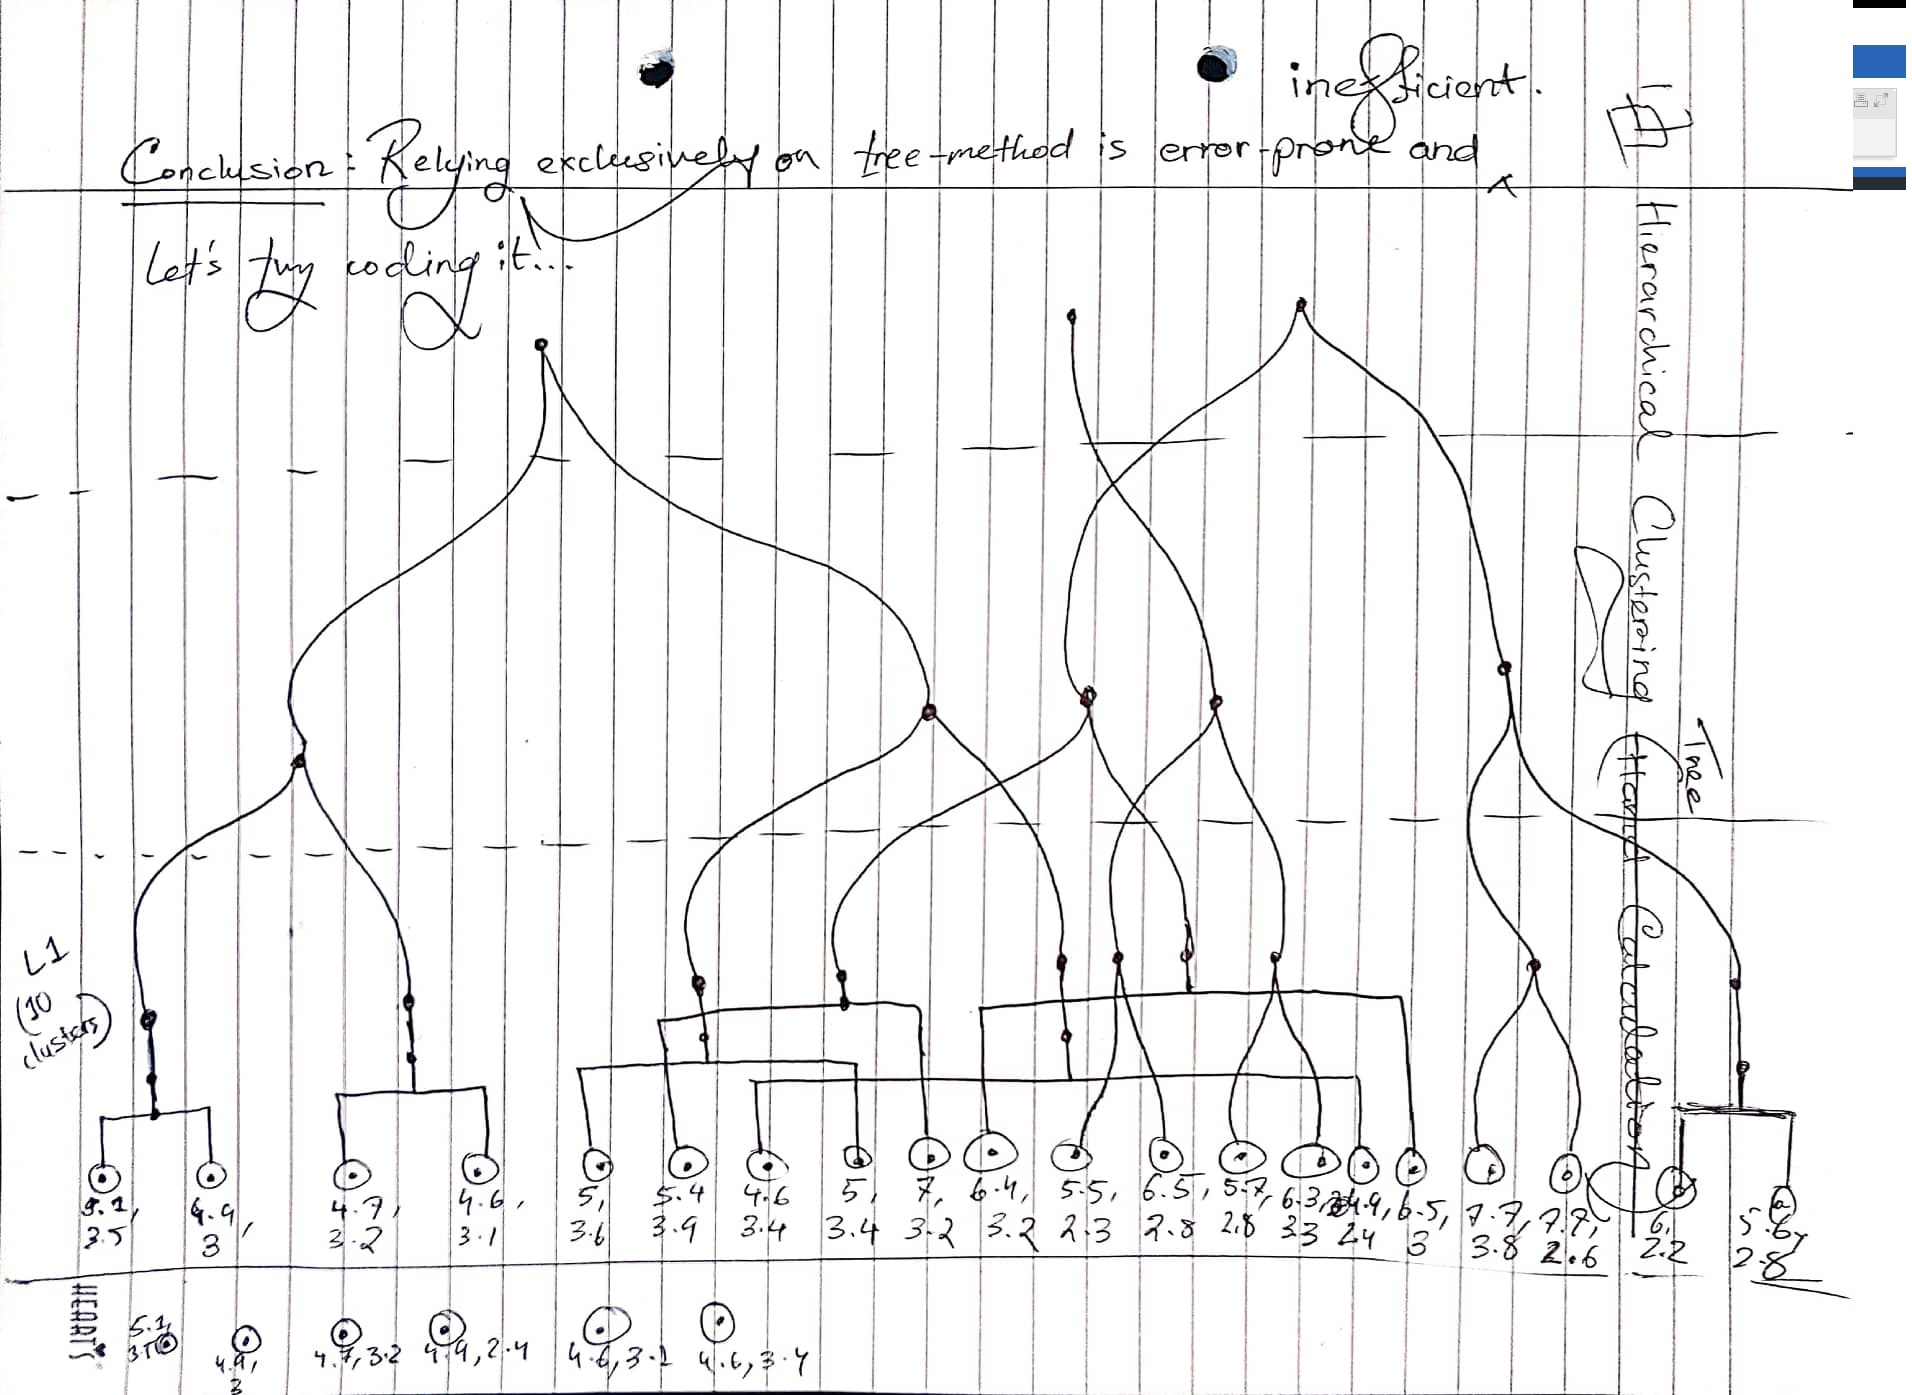

# Q2: Implement the hierarchical clustering from Q1.

For this implementation, we will use the following:

###Arrays:
* Lines: 20 x 2 dimensional array storing the coordinates of each point.
* Clusters: 20 x 1 array. Keeps track of each point's cluster assignment.
* clusters_remaining: list containing the cluster number of all the remaining clusters. Populated by returning unique (clusters). 
* centroids: n x d array. Stores the coordinates of each centroids.

#Functions:
###FindNearests(tuple thispoint): 
* let, n = 10
* populates a list with n unique neighbors of thispoint
* sorts the list with the closest one at the top
* Returns the list.

###init_centroids:
* Base case variant of the cluster merge operation: every point is a centroid. Therefore, there will be n centroids.
* init list clusters_remaining with integer values (0,1,...19).
* for each cluster_number in clusters_remaining,
** thiscentroid = centroid of all points that belong to cluster_number.
** centroids[cluster_number] = thiscentroid

###merge_centroids:
* alreadyMerged = [] # stores cluster numbers of the clusters that have already been merged this iteration.
* i = count (number of clusters remaining). merge_centroids will run i/2 times.
* for cluster_index in clusters_remaining:
** if cluster_index is in alreadyMerged, continue loop (skip current iteration).
** nearests = findNearests ( centroids[cluster_index]).
** from nearests, find the index of the closest neighboring centroid that isn't in alreadyMerged. call it nearest_cluster.
** in clusters array, identify all rows that have a value of nearest_cluster. Set them all equal to cluster_index.
** Append cluster_index and nearest_cluster into alreadyMerged so that these points[indexed] are not touched for the remaining loop iterations.
** Remove index value 'nearest_cluster' from clusters_remaining list.
** repeat for loop.


 








In [ ]:
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import csv
def load():

  global lines

  # hierarchical cluster data

  file = open('hierarchicalClusterData.csv', 'r')
  reader = csv.reader(file)

  # load data 
  lines = []
  for row in reader:
    newline = []
    for element in row:
      newline.append(element)
    lines.append(newline)

  # remove string data
  del lines[0]
  lines = np.array (lines)
  lines = lines.astype(float)

  # add integer indexes
  # indexcolumn = np.array(np.arange(20))
  # indexcolumn = indexcolumn.reshape((20,1))
  # lines = np.concatenate( (indexcolumn , lines), axis=1)
  x = lines[0:,0]
  y = lines[0:,1]


  print(np.shape(lines))

In [ ]:
#INIT CLUSTERS ARRAY: stores cluster affiliation of each datapoint
def init():
  d = 2
  n = 20
  clusters = np.ndarray((n,1))

  for i in range(0,n):
    clusters[i][0] = i
  print('initiated cluster affiliations array of size n x 1')

  # INIT CENTROIDS ARRAY: stores coordinates of each centroid
  centroids = np.ndarray((n,d))
  for i in range (0,n):
    for j in range (0,d):
      centroids[i][j] = lines[i][j] # plus one to skip the index column
  print(n, 'centroids initialized.')

  clusters_remaining =   list(np.arange (0,20))
  print(len(clusters_remaining), 'clusters_remaining.\n')

  alreadyMerged = []
  # let, k = 4. We will run hcluster until only 4 or less clusters remain.
  # to remove element of value i from clusters_remaining, use: clusters_remaining.pop(i)
  return centroids, clusters, clusters_remaining, alreadyMerged

In [ ]:
from scipy.spatial import distance

def bubble_sort_euclidean ( thispoint, nindexes ):
  # like regular sorting, but instead of sorting 1D integers in order of their value,
  # we will sort 2D values in order of their distance from "thispoint".
  # therefore, just find any instances of neighbors[j] or neighbors[j+1]
  # and replace them with distance.euclidean ( thispoint, neighbors[j] )
  # and replace them with distance.euclidean ( thispoint, neighbors[j+1] )
  
  n = len(nindexes)

  for i in range(n):
      # Create a flag that will allow the function to
      # terminate early if there's nothing left to sort
      already_sorted = True

      # Start looking at each item of the list one by one,
      # comparing it with its adjacent value. With each
      # iteration, the portion of the nindexes that you look at
      # shrinks because the remaining items have already been
      # sorted.
      for j in range(n - i - 1):
          if distance.euclidean ( thispoint, centroids[(nindexes[j])])  > distance.euclidean ( thispoint, centroids[j+1]) :
              # ^If jth point is closer to thispoint than j+1 item is, then swap them
              nindexes[j], nindexes[j + 1] = nindexes[j + 1], nindexes[j]

              # Since you had to swap two elements,
              # set the `already_sorted` flag to `False` so the
              # algorithm doesn't finish prematurely
              already_sorted = False

      # If there were no swaps during the last iteration,
      # the array is already sorted, and you can terminate
      if already_sorted:
          break

  return nindexes

def bsort_euclid (thispoint, nindexes):
  n = len(nindexes)

  # Traverse through all array elements
  for i in range(n):

    # Last i elements are already in place
    for j in range(0, n-i-1):

      # traverse the array from 0 to n-i-1
      # Swap if the element found is greater
      # than the next element
      if distance.euclidean(thispoint, centroids[nindexes[j]] ) > distance.euclidean(thispoint, centroids[nindexes[j+1]]):
          nindexes[j], nindexes[j+1] = nindexes[j+1], nindexes[j]
  return nindexes

In [ ]:
def findNearestIndexes ( thispoint ):
  # (plural indexes. use this one.)

  print('finding index of nearest point from ', thispoint )

  # populates a list nearests with n unique neighbors of thispoint
  neighbor_indexes = []
  for i in range(0, 20):
    #avoiding neighboring with self
    if lines[i][0] == thispoint[0] and lines[i][1] == thispoint[1]:
        print('same point. Avoiding.')
        continue
    else:
      neighbor_indexes.append(i)

  # sorts the neighbors: places points closest to thispoint at top/front.
  #sortNeighbors ( thispoint, neighbors )
  neighbors_indexes = bubble_sort_euclidean(thispoint)
  
  # Returns the list.
  return neighbors_indexes

In [ ]:
def get_nearests_centroids( thispoint ):
  # populates a list nearests with n unique neighbors of thispoint
  neighbor_indexes = []
  for i in range(0, 20):
    #avoiding neighboring with self
    if lines[i][0] == thispoint[0] and lines[i][1] == thispoint[1]:
        print('same point. Avoiding.')
        continue
    else:
      neighbor_indexes.append(i)

  #sorts the neighbor_indexes array so that the closest centroid number is at the beginning of the list
  sorted_neighbor_indexes = bsort_euclid (thispoint, neighbor_indexes)

  return sorted_neighbor_indexes

In [ ]:
def merge_centroids(a,b, clust, crem, amerg ):
  print("centroids merged so far:" , amerg)
  # merging cluster numbers a and b so that only a is in clusters_remaining:
  # a = 0
  # b = 4
  # in clusters array, find all rows that have value b. change them into a.
  for i in range (0, 20):
    if (int(clust[i][0])) == b:
      clust[i] = a
      print('reclustered')
  # b no longer exists. Let the clusters_remaining array reflect that.
  
  if(len(crem)>0):
    try:
      crem.pop(b)
      print('crem popped. clusters remaining: ', clusters_remaining )
    except:
      print('no more clusters remaining')
  # print(clust)
  amerg.append(a)
  amerg.append(b)
  
  return clust, crem, amerg    
  
# # # TESTING merge_centroids
# centroids, clusters, clusters_remaining, alreadyMerged = init()

# clusters, clusters_remaining, alreadyMerged = merge_centroids (0,3, clusters, clusters_remaining, alreadyMerged)
# print('after merging:' , clusters)
# print('after merging:', clusters_remaining)


In [ ]:
# base case
load()
centroids, clusters, clusters_remaining, alreadyMerged = init()

print(clusters_remaining)
print('already merged: ', alreadyMerged)

# clusters, clusters_remaining = merge_centroids (0,4, clusters, clusters_remaining)
# clusters, clusters_remaining = merge_centroids (2,6, clusters, clusters_remaining)


# iterative case
# PROBLEM: pop index out of range
for cluster_index in clusters_remaining:
  if (cluster_index in alreadyMerged):
    continue
  # else, find nearests unmerged centroid.
  for c in get_nearests_centroids(centroids[cluster_index]):
    print('merging with nearest centroid number' , c )
    if (c in alreadyMerged):
      print('point already merged. Skipping...')
      continue
    #so if this nearest centroid hasnt been merged yet...
    print('Joining clusters' , cluster_index , 'and', c )
    print('clusters remaining:', clusters_remaining)
    clusters, clusters_remaining, alreadyMerged= merge_centroids (cluster_index,c, clusters, clusters_remaining, alreadyMerged)
    break
  print(clusters)
  



(20, 2)
initiated cluster affiliations array of size n x 1
20 centroids initialized.
20 clusters_remaining.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
already merged:  []
same point. Avoiding.
merging with nearest centroid number 4
Joining clusters 0 and 4
clusters remaining: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
centroids merged so far: []
reclustered
crem popped. clusters remaining:  [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 0.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]]
same point. Avoiding.
merging with nearest centroid number 2
Joining clusters 1 and 2
clusters remaining: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
centroids merged so far: [0, 4]
reclustered
crem popped. clusters remaining:  [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[[ 0.]
 [ 1.]
 [ 1.]
 [